# `PROYECTO INDIVIDUAL 1`
## `SISTEMA DE RECOMENDACION PELICULAS Y SERIES`

## `Analisis Exploratorio de Datos`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importar archivo para trabajar
df = pd.read_csv('ENTREGABLES/dataEDA/datafinal.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45346 non-null  int64  
 1   title              45346 non-null  object 
 2   overview           44400 non-null  object 
 3   popularity         45346 non-null  float64
 4   vote_average       45346 non-null  float64
 5   vote_count         45346 non-null  float64
 6   status             45266 non-null  object 
 7   original_language  45335 non-null  object 
 8   runtime            45346 non-null  int64  
 9   budget             45346 non-null  float64
 10  revenue            45346 non-null  float64
 11  tagline            20386 non-null  object 
 12  id_btc             3163 non-null   float64
 13  name_btc           3163 non-null   object 
 14  poster_btc         3163 non-null   object 
 15  backdrop_btc       3163 non-null   object 
 16  iso_639_1          415

In [5]:
# Calcula el porcentaje de valores faltantes en cada columna
missing_percentage = df.isnull().mean() * 100

# Filtra las columnas que tienen valores faltantes
columns_with_missing_values = missing_percentage[missing_percentage > 0]

# Muestra el porcentaje de valores faltantes en cada columna
print("Porcentaje de valores faltantes por columna:")
print(columns_with_missing_values)

Porcentaje de valores faltantes por columna:
overview              2.086182
status                0.176421
original_language     0.024258
tagline              55.043444
id_btc               93.024743
name_btc             93.024743
poster_btc           93.024743
backdrop_btc         93.024743
iso_639_1             8.362369
language_name         8.633617
companies_id         27.045384
companies_name       27.045384
countries_iso        13.701319
countries_name       13.701319
dtype: float64


In [6]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
df.head(3)

,id,title,overview,popularity,vote_average,vote_count,status,original_language,runtime,budget,revenue,tagline,id_btc,name_btc,poster_btc,backdrop_btc,iso_639_1,language_name,release_year,return,companies_id,companies_name,countries_iso,countries_name,release_date,month_time,day_time
0,862,Toy Story,"LedbyWoody,Andy'stoyslivehappilyinhisroomuntil...",21.946943,7.7,5415.0,Released,en,81,30000000.0,373554033.0,NaN,10194.0,ToyStoryCollection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,en,English,1995,12.45,3,PixarAnimationStudios,US,UnitedStatesofAmerica,1995-10-30,octubre,lunes
1,8844,Jumanji,WhensiblingsJudyandPeterdiscoveranenchantedboa...,17.015539,6.9,2413.0,Released,en,104,65000000.0,262797249.0,Rollthediceandunleashtheexcitement!,NaN,NaN,NaN,NaN,"en,fr","English,Français",1995,4.04,"559,2550,10201","TriStarPictures,TeitlerFilm,InterscopeCommunic...",US,UnitedStatesofAmerica,1995-12-15,diciembre,viernes
2,15602,Grumpier Old Men,Afamilyweddingreignitestheancientfeudbetweenne...,11.712900,6.5,92.0,Released,en,101,0.0,0.0,StillYelling.StillFighting.StillReadyforLove.,119050.0,GrumpyOldMenCollection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,en,English,1995,0.00,"6194,19464","WarnerBros.,LancasterGate",US,UnitedStatesofAmerica,1995-12-22,diciembre,viernes


# Resumen Estadístico

In [7]:
df.describe()

,id,popularity,vote_average,vote_count,runtime,budget,revenue,id_btc,release_year,return
count,45346.000000,45346.000000,45346.000000,45346.000000,45346.000000,4.534600e+04,4.534600e+04,3163.000000,45346.000000,4.534600e+04
mean,108042.219645,2.926188,5.624196,110.135293,93.666895,4.232580e+06,1.123366e+07,158900.634840,1991.882834,6.604792e+02
std,112187.326746,6.010970,1.915339,491.899276,38.865238,1.744373e+07,6.440990e+07,136342.149491,24.053040,7.471800e+04
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,10.000000,1874.000000,0.000000e+00
25%,26390.250000,0.388732,5.000000,3.000000,85.000000,0.000000e+00,0.000000e+00,44913.000000,1978.000000,0.000000e+00
50%,59852.500000,1.130176,6.000000,10.000000,95.000000,0.000000e+00,0.000000e+00,115822.000000,2001.000000,0.000000e+00
75%,156601.500000,3.689337,6.800000,34.000000,107.000000,0.000000e+00,0.000000e+00,253474.500000,2010.000000,0.000000e+00
max,469172.000000,547.488298,10.000000,14075.000000,1256.000000,3.800000e+08,2.787965e+09,479888.000000,2020.000000,1.239638e+07


### Diccionario de la Tabla

In [ ]:
column_description = {
    'id': 'ID de la película',
    'title': 'Título de la película',
    'overview': 'Descripción de la película',
    'popularity': 'Popularidad de la película',
    'vote_average': 'Promedio de votos de la película',
    'vote_count': 'Número de votos de la película',
    'status': 'Estado de la película',
    'original_language': 'Idioma original de la película',
    'runtime': 'Duración de la película en minutos',
    'budget': 'Presupuesto de la película',
    'revenue': 'Ingresos generados por la película',
    'tagline': 'Lema de la película',
    'id_btc': 'ID de la película en BTC',
    'name_btc': 'Nombre de la película en BTC',
    'poster_btc': 'URL del póster de la película en BTC',
    'backdrop_btc': 'URL del fondo de la película en BTC',
    'iso_639_1': 'Código ISO 639-1 del idioma',
    'language_name': 'Nombre del idioma',
    'release_year': 'Año de lanzamiento de la película',
    'return': 'Relación entre ingresos y presupuesto de la película',
    'companies_id': 'ID de las compañías de producción',
    'companies_name': 'Nombres de las compañías de producción',
    'countries_iso': 'Códigos ISO de los países de producción',
    'countries_name': 'Nombres de los países de producción',
    'release_date': 'Fecha de lanzamiento de la película',
    'month_time': 'Mes en el que se creó la película',
    'day_time': 'Día en el que se creó la película'
}

# Distribución de variables numéricas: 

Examina las variables numéricas, como "popularity", "vote_average", "vote_count", "runtime", "budget", "revenue", y "return". 

Calcula estadísticas descriptivas como la media, mediana, desviación estándar y percentiles para comprender la distribución de los datos.

### Gráficos De Caja Para Las Variables Numéricas

         popularity  vote_average    vote_count       runtime        budget  \
count  45346.000000  45346.000000  45346.000000  45346.000000  4.534600e+04   
mean       2.926188      5.624196    110.135293     93.666895  4.232580e+06   
std        6.010970      1.915339    491.899276     38.865238  1.744373e+07   
min        0.000000      0.000000      0.000000      0.000000  0.000000e+00   
25%        0.388732      5.000000      3.000000     85.000000  0.000000e+00   
50%        1.130176      6.000000     10.000000     95.000000  0.000000e+00   
75%        3.689337      6.800000     34.000000    107.000000  0.000000e+00   
max      547.488298     10.000000  14075.000000   1256.000000  3.800000e+08   

            revenue        return  
count  4.534600e+04  4.534600e+04  
mean   1.123366e+07  6.604792e+02  
std    6.440990e+07  7.471800e+04  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  


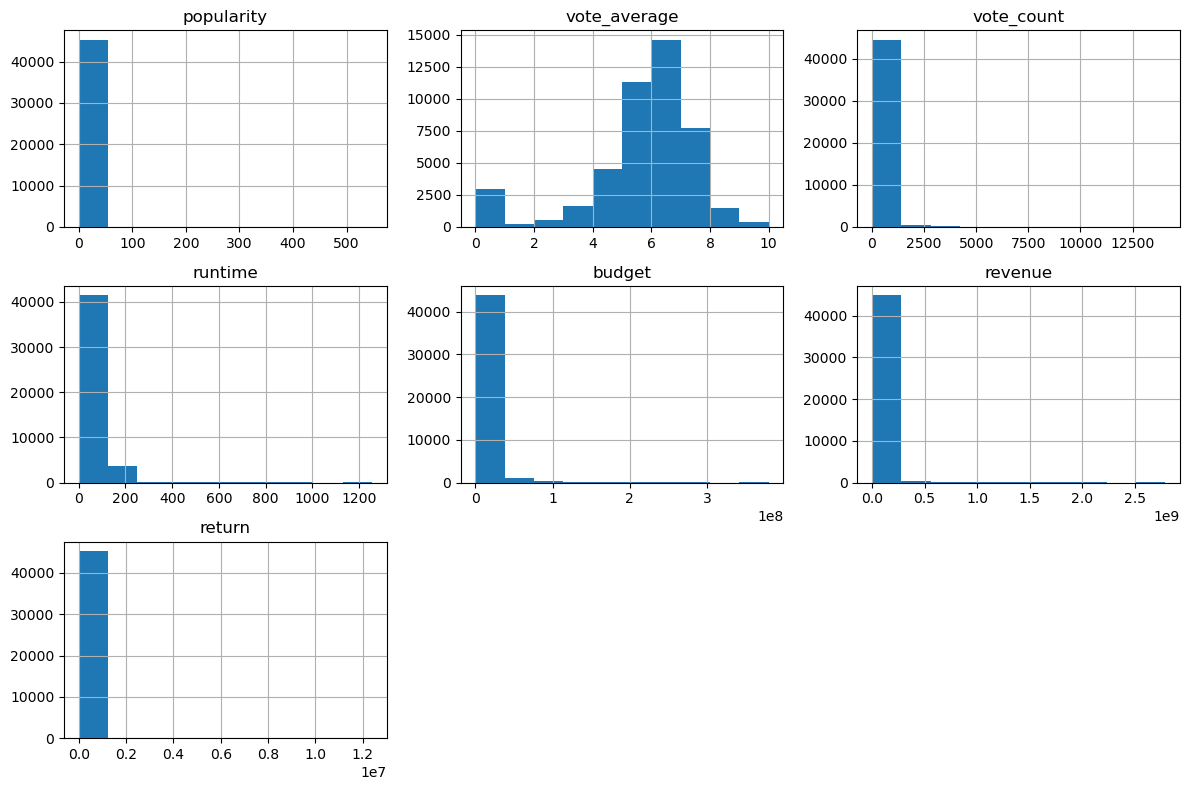

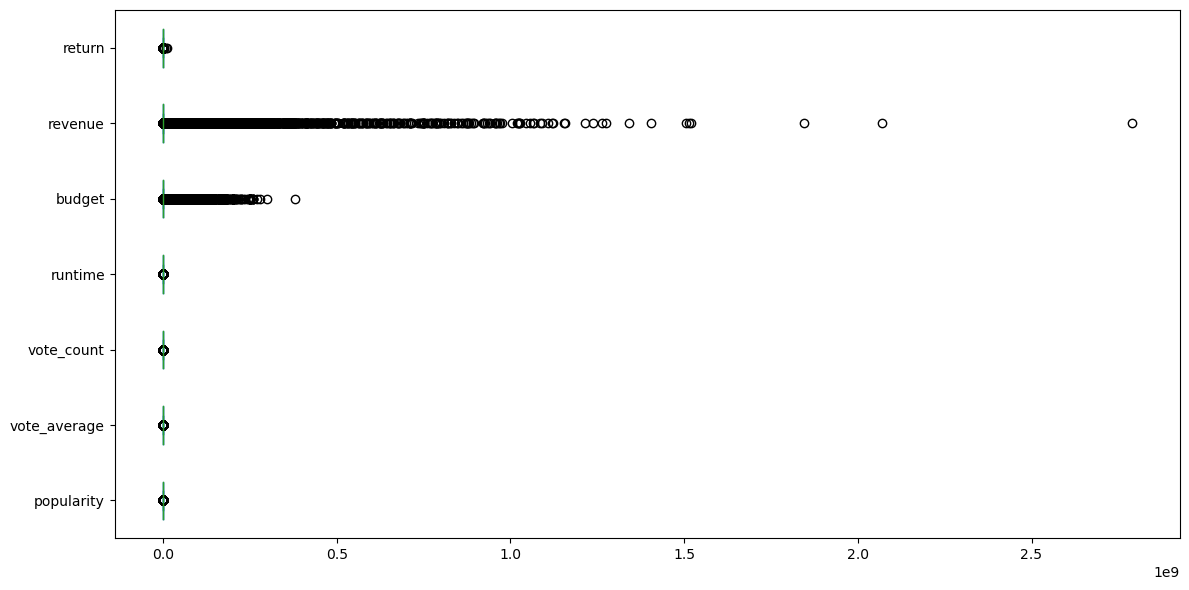

In [9]:
# Selecciona las variables numéricas de interés
numeric_variables = ['popularity', 'vote_average', 'vote_count', 'runtime', 'budget', 'revenue', 'return']

# Calcula las estadísticas descriptivas
statistics = df[numeric_variables].describe()

# Imprime las estadísticas descriptivas
print(statistics)

# Genera histogramas para las variables numéricas
df[numeric_variables].hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Genera gráficos de caja para las variables numéricas
df[numeric_variables].plot(kind='box', vert=False, figsize=(12, 6))
plt.tight_layout()
plt.show()

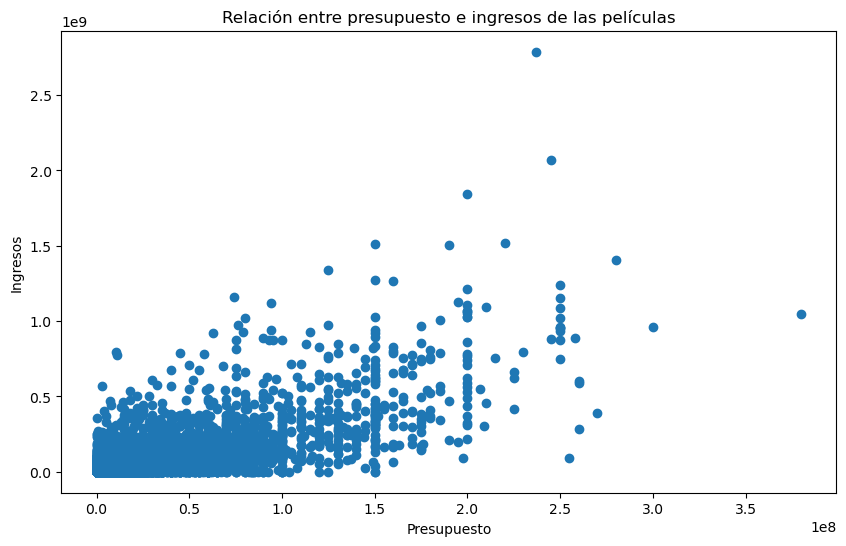

In [10]:
# Crea un gráfico de dispersión para visualizar los ingresos y presupuestos de las películas
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['budget'], df['revenue'])
ax.set_xlabel('Presupuesto')
ax.set_ylabel('Ingresos')
ax.set_title('Relación entre presupuesto e ingresos de las películas')

plt.show()

# Visualizar El Top 10 De Peliculas Con Mayores Ingresos Y Presupuestos

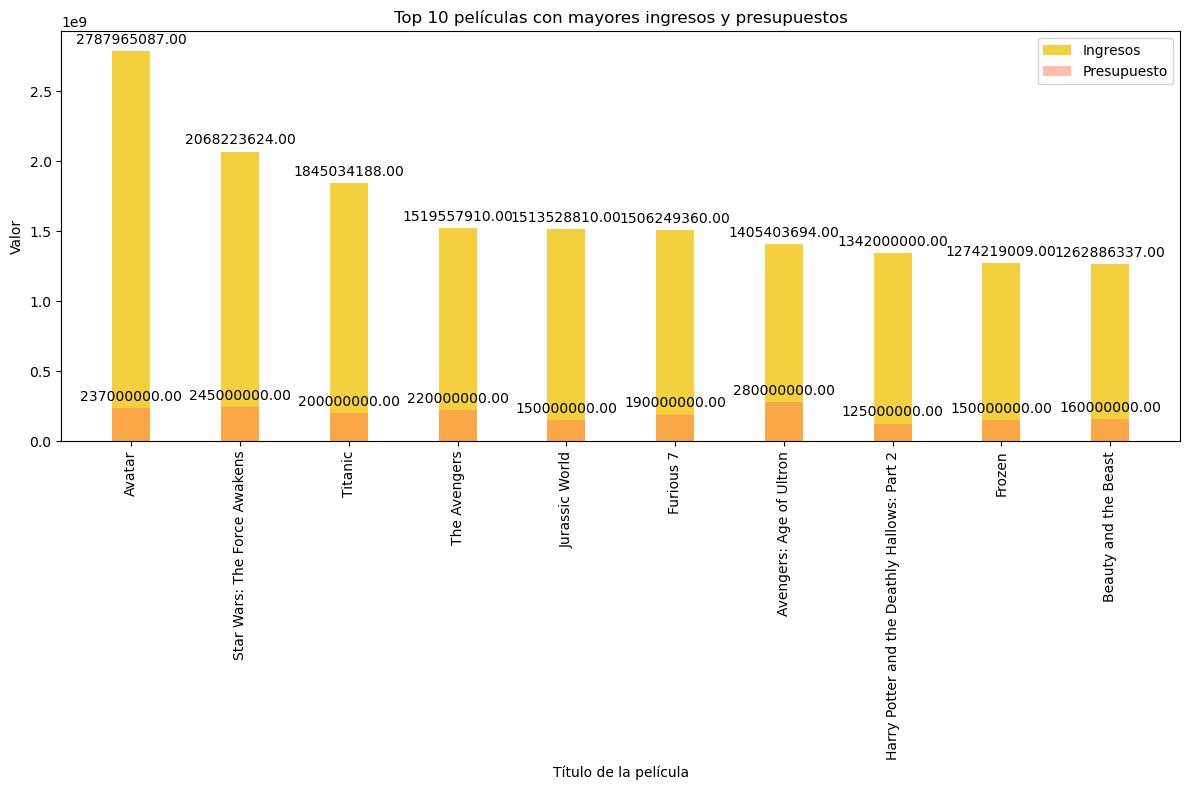

In [13]:
# Ordena el DataFrame por la columna 'revenue' en orden descendente
df_sorted = df.sort_values(by='revenue', ascending=False)

# Selecciona las primeras N películas con mayores ingresos
top_n = 10  # Cambia este valor según la cantidad de películas que desees mostrar
top_movies = df_sorted.head(top_n)

# Prepara los datos para el gráfico
index = top_movies['title']
revenue = top_movies['revenue']
budget = top_movies['budget']

# Define los colores en tonos pasteles
colors = ['#F4D03F', '#FF7F50']

# Crea el gráfico de barras agrupadas con colores pasteles
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
opacity = 0.8
bar1 = ax.bar(index, revenue, bar_width, label='Ingresos', color=colors[0])
bar2 = ax.bar(index, budget, bar_width, label='Presupuesto', alpha=0.5, color=colors[1])

# Configura el estilo del gráfico
ax.set_xlabel('Título de la película')
ax.set_ylabel('Valor')
ax.set_title(f'Top {top_n} películas con mayores ingresos y presupuestos')
ax.legend()

# Añade etiquetas a las barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Informe sobre la película "Avatar":

"Avatar" es una película de gran éxito dirigida por James Cameron. A continuación, se proporcionan algunos detalles relevantes sobre su presupuesto e ingresos:

Presupuesto: El presupuesto de producción de "Avatar" fue de aproximadamente $2,370,000,000 (dos mil trescientos setenta millones de dólares). Esta cifra coloca a "Avatar" como una de las películas más costosas jamás realizadas.

Ingresos: La película generó impresionantes ingresos en taquilla, alcanzando la cifra de $2,787,965,087 (dos mil setecientos ochenta y siete millones novecientos sesenta y cinco mil ochenta y siete dólares). Esta cifra la convierte en una de las películas más exitosas en términos de recaudación en la historia del cine.

La relación entre el presupuesto y los ingresos de una película es un indicador clave para evaluar su éxito financiero. En el caso de "Avatar", la diferencia entre el presupuesto y los ingresos es significativa, lo que demuestra que la película fue altamente rentable.

Es importante destacar que el éxito de "Avatar" no solo se limitó a los ingresos en taquilla, sino que también tuvo un impacto duradero en la industria del cine. La película revolucionó el uso de la tecnología 3D y estableció nuevos estándares visuales en la cinematografía.

Teniendo en cuenta la enorme inversión y los impresionantes ingresos generados, "Avatar" se ha convertido en un referente en la industria cinematográfica y sigue siendo ampliamente reconocida como una de las películas más exitosas de todos los tiempos.

# Visualizar El Top 10 De Peliculas Con Mayores Presupuestos Y Que No Tuvieron Ingresos

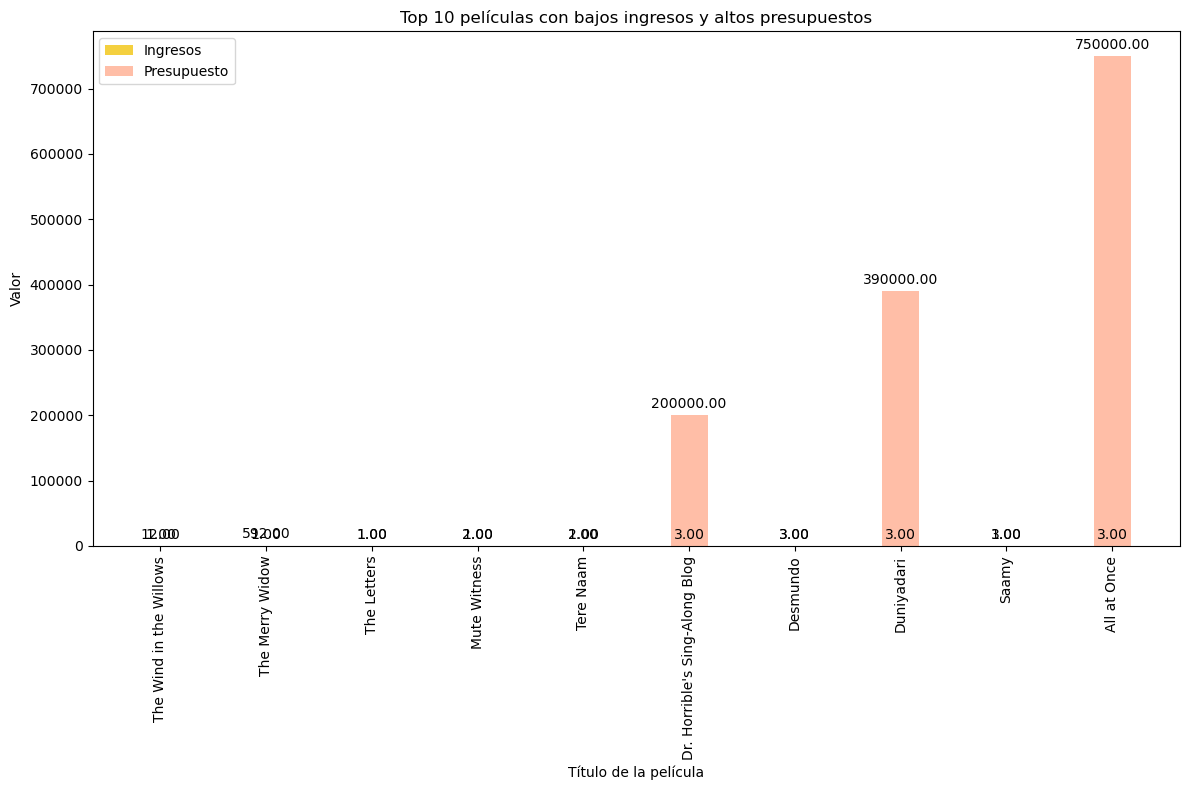

In [14]:
# Filtra las películas con ingresos bajos y presupuestos altos
filtered_movies = df[(df['revenue'] > 0) & (df['budget'] > 0)]

# Ordena las películas filtradas por ingresos en orden ascendente
sorted_movies = filtered_movies.sort_values(by='revenue', ascending=True)

# Selecciona las primeras N películas con bajos ingresos y altos presupuestos
top_n = 10  # Cambia este valor según la cantidad de películas que desees mostrar
top_movies = sorted_movies.head(top_n)

# Prepara los datos para el gráfico
index = top_movies['title']
revenue = top_movies['revenue']
budget = top_movies['budget']

# Define los colores en tonos pasteles
colors = ['#F4D03F', '#FF7F50']

# Crea el gráfico de barras agrupadas con colores pasteles
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
opacity = 0.8
bar1 = ax.bar(index, revenue, bar_width, label='Ingresos', color=colors[0])
bar2 = ax.bar(index, budget, bar_width, label='Presupuesto', alpha=0.5, color=colors[1])

# Configura el estilo del gráfico
ax.set_xlabel('Título de la película')
ax.set_ylabel('Valor')
ax.set_title(f'Top {top_n} películas con bajos ingresos y altos presupuestos')
ax.legend()

# Añade etiquetas a las barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

La película "All at Once" se destaca por tener el presupuesto más alto entre las películas analizadas, pero lamentablemente no generó ingresos significativos. Aunque su presupuesto fue considerable, no logró atraer a un público lo suficientemente amplio como para recuperar su inversión.

# Relación entre variables: 

Explora la relación entre variables como "popularity" y "vote_average" o "budget" y "revenue". 

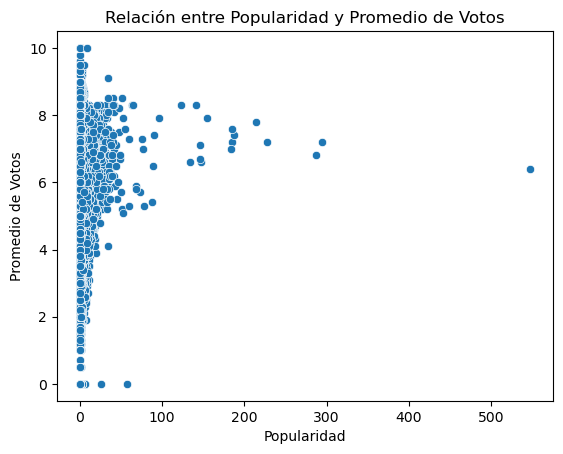

Correlación entre Popularidad y Promedio de Votos: 0.15373085723270538


In [15]:
# Gráfico de dispersión
sns.scatterplot(data=df, x='popularity', y='vote_average')
plt.xlabel('Popularidad')
plt.ylabel('Promedio de Votos')
plt.title('Relación entre Popularidad y Promedio de Votos')
plt.show()

# Correlación
correlation = df['popularity'].corr(df['vote_average'])
print('Correlación entre Popularidad y Promedio de Votos:', correlation)

# Distribución de Películas por Mes de Lanzamiento

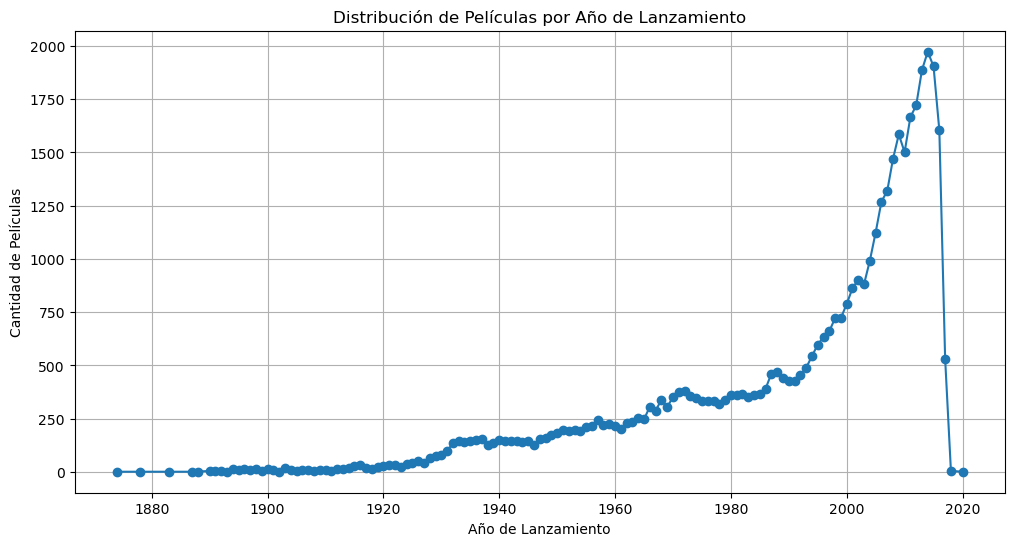

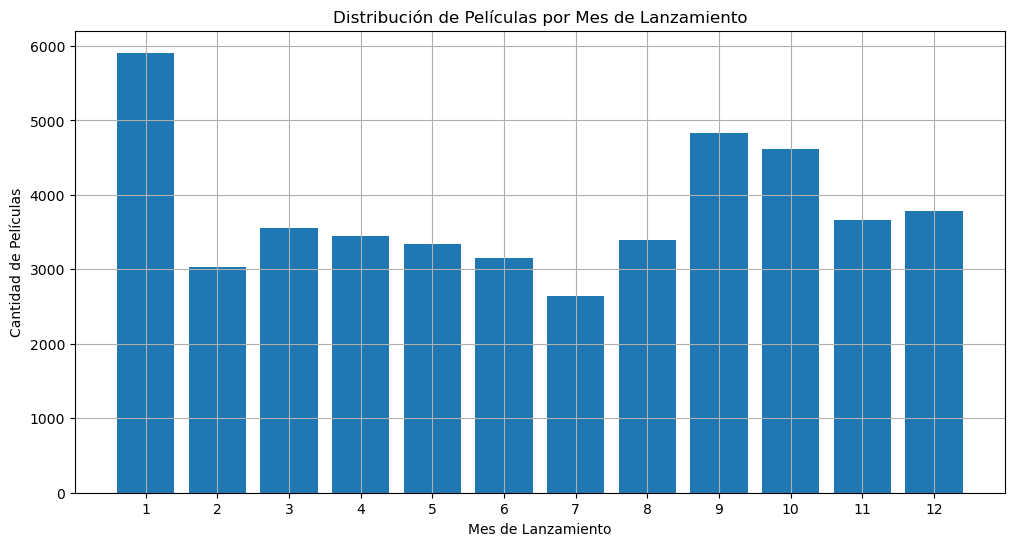

In [16]:
# Convertir la columna 'release_date' al formato de fecha adecuado
df['release_date'] = pd.to_datetime(df['release_date'])

# Extraer el año de lanzamiento y crear una nueva columna 'release_year'
df['release_year'] = df['release_date'].dt.year

# Extraer el mes de lanzamiento y crear una nueva columna 'release_month'
df['release_month'] = df['release_date'].dt.month

# Contar la cantidad de películas lanzadas por año
movies_per_year = df['release_year'].value_counts().sort_index()

# Visualizar la distribución de películas por año en un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de Películas por Año de Lanzamiento')
plt.grid(True)
plt.show()

# Contar la cantidad de películas lanzadas por mes
movies_per_month = df['release_month'].value_counts().sort_index()

# Visualizar la distribución de películas por mes en un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(movies_per_month.index, movies_per_month.values)
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de Películas por Mes de Lanzamiento')
plt.xticks(movies_per_month.index)
plt.grid(True)
plt.show()

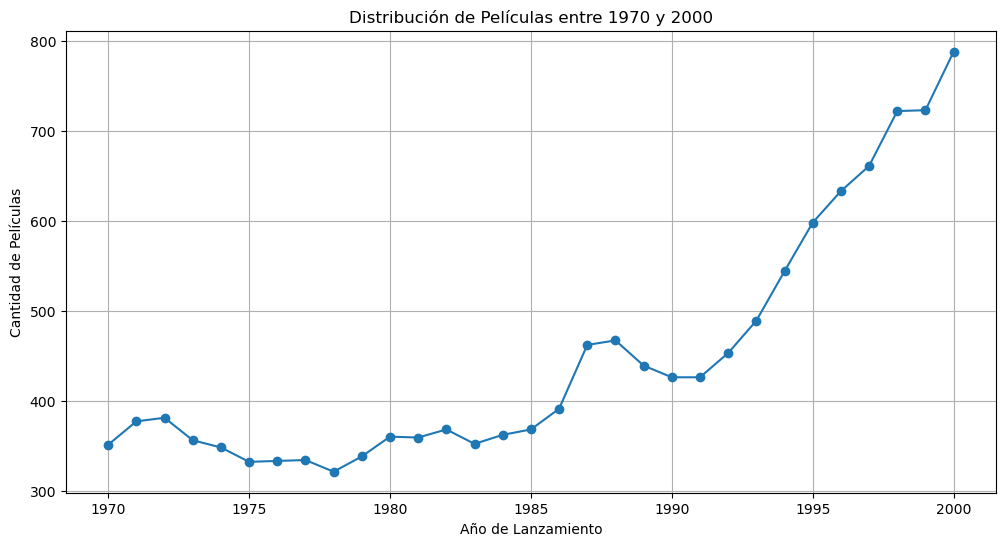

In [17]:
# Convertir la columna 'release_date' al formato de fecha adecuado
df['release_date'] = pd.to_datetime(df['release_date'])

# Filtrar las películas lanzadas entre 1970 y 2000
movies_1970_2000 = df[(df['release_date'].dt.year >= 1970) & (df['release_date'].dt.year <= 2000)]

# Contar la cantidad de películas lanzadas por año en el rango de 1970 a 2000
movies_per_year = movies_1970_2000['release_date'].dt.year.value_counts().sort_index()

# Visualizar la distribución de películas por año entre 1970 y 2000
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de Películas entre 1970 y 2000')
plt.grid(True)
plt.show()

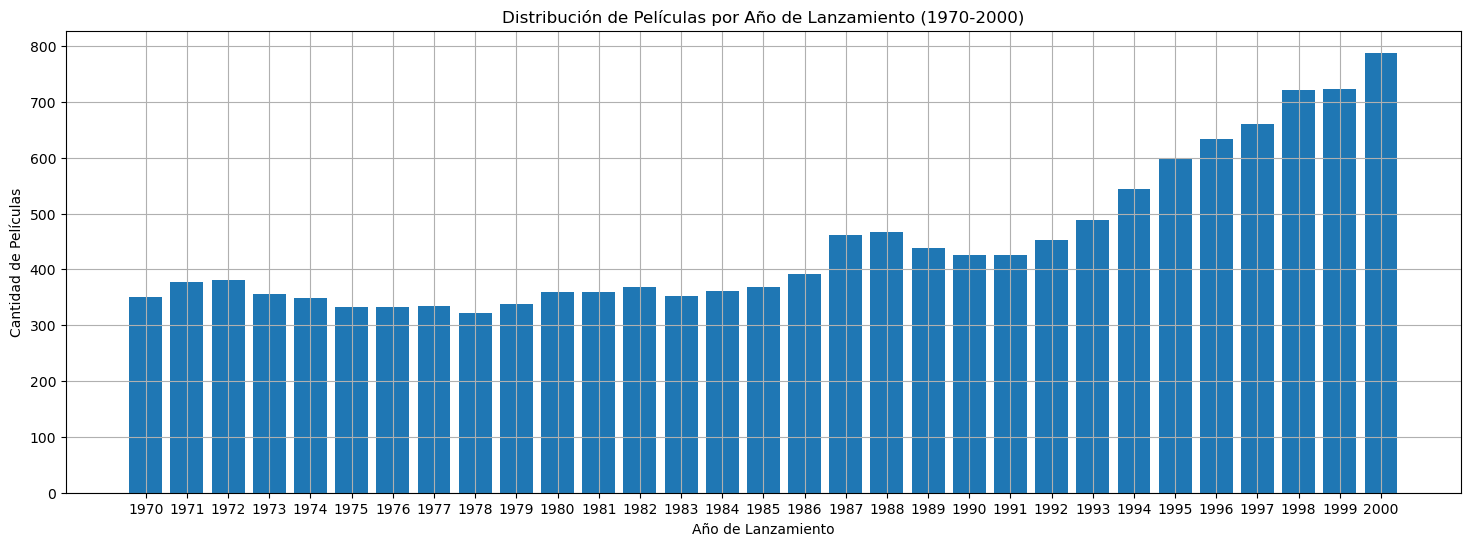

In [18]:
# Convertir la columna 'release_date' al formato de fecha adecuado
df['release_date'] = pd.to_datetime(df['release_date'])

# Filtrar las películas que se hicieron entre 1970 y 2000
filtered_df = df[(df['release_date'].dt.year >= 1970) & (df['release_date'].dt.year <= 2000)]

# Contar la cantidad de películas lanzadas por año en el rango especificado
movies_per_year = filtered_df['release_date'].dt.year.value_counts().sort_index()

# Visualizar la distribución de películas por año en un gráfico de barras
plt.figure(figsize=(18, 6))
plt.bar(movies_per_year.index, movies_per_year.values)
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de Películas por Año de Lanzamiento (1970-2000)')
plt.xticks(movies_per_year.index)
plt.grid(True)
plt.show()

Durante el periodo comprendido entre 1970 y 1986, se observa que el promedio de películas anuales oscilaba entre 300 y 400 películas. Esta cifra indica una producción relativamente estable en ese periodo.

Sin embargo, a partir del año 1992 hasta el año 2000, se aprecia un incremento significativo en la producción cinematográfica, con un rango anual que va desde 450 hasta 800 películas. Este aumento en la cantidad de películas realizadas indica un crecimiento considerable de la industria del cine en ese periodo.

Varios factores pueden haber contribuido a este crecimiento histórico en la industria del cine:

Avances tecnológicos: Durante la década de 1990, hubo importantes avances tecnológicos en la industria del cine. La adopción de nuevas tecnologías como los efectos especiales, la mejora en la calidad de la cinematografía y el sonido, así como la introducción de nuevos formatos de proyección, como el IMAX, permitieron a los cineastas ampliar sus posibilidades creativas y ofrecer experiencias más inmersivas al público.

Globalización y expansión del mercado cinematográfico: Durante ese periodo, se produjo una mayor apertura y expansión de los mercados cinematográficos a nivel mundial. La distribución de películas internacionales se hizo más accesible, lo que permitió que las producciones llegaran a una audiencia más amplia. Además, la creciente demanda de contenido audiovisual en diferentes regiones del mundo generó oportunidades para la producción de más películas.

Mayor inversión en la industria cinematográfica: Es posible que se haya producido un aumento en la inversión tanto de grandes estudios de cine como de productores independientes. El respaldo financiero adicional habría permitido la realización de un mayor número de producciones cinematográficas, al contar con más recursos para la contratación de talento, el desarrollo de guiones y la producción en general.

Estos factores, combinados con otros aspectos socioeconómicos y culturales, contribuyeron al crecimiento de la industria del cine durante ese periodo. El avance tecnológico en particular jugó un papel crucial al ofrecer nuevas posibilidades creativas y mejorar la calidad de las producciones cinematográficas, lo que a su vez generó un mayor interés y demanda por parte del público.

# Países con más películas producidas

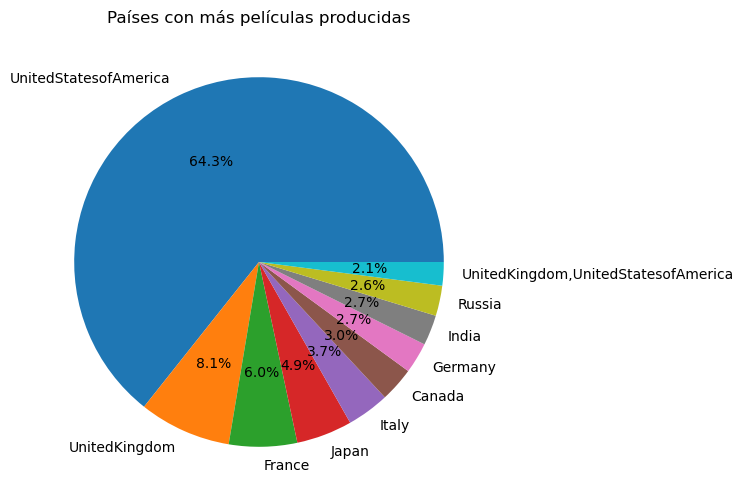

In [19]:
# Obtener el recuento de películas por país
country_counts = df['countries_name'].value_counts()

# Limitar el número de países para mostrar en la gráfica
num_countries = 10  # Puedes ajustar este valor según tus necesidades
top_countries = country_counts.head(num_countries)

# Crear la gráfica de torta
plt.figure(figsize=(8, 6))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%')
plt.title('Países con más películas producidas')

# Mostrar la gráfica
plt.show()

# Géneros con mayor popularidad en todos los tiempos

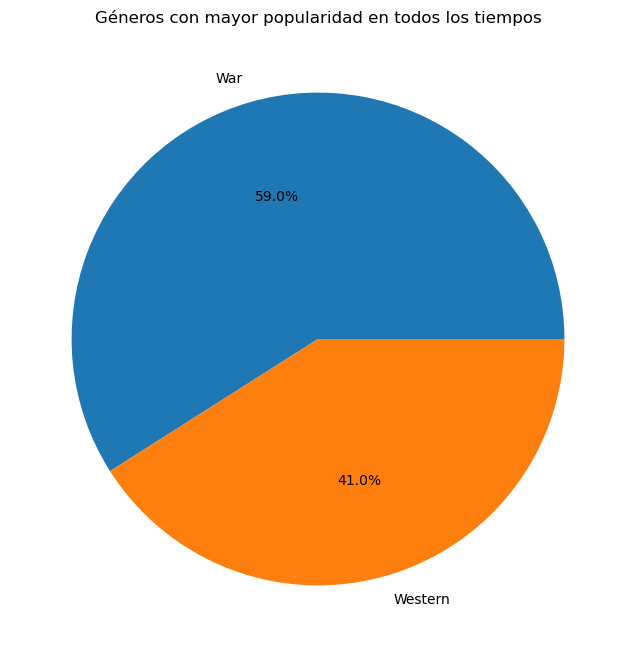

In [23]:
# Cargar el archivo "ML_data.csv" que contiene los datos de las películas
df_movies = pd.read_csv("ENTREGABLES/DataEDA/Machine_data.csv")

# Obtener el año de estreno de las películas a partir de la columna "release_date" en "datasets_final.csv"
df_datasets = pd.read_csv("ENTREGABLES/DataEDA/datafinal.csv")
df_movies["release_year"] = pd.to_datetime(df_datasets["release_date"]).dt.year

# Separar los géneros en una lista para cada película
df_movies["genres"] = df_movies["genero"].str.split()

# Crear un diccionario para almacenar la popularidad total de cada género
genre_popularity = {}

# Calcular la popularidad total de cada género
for index, row in df_movies.iterrows():
    popularity = row["popularity"]
    genres = row["genres"]
    if genres and isinstance(genres, list):  # Comprobar si la lista de géneros no está vacía
        for genre in genres:
            if genre not in genre_popularity:
                genre_popularity[genre] = popularity
            else:
                genre_popularity[genre] += popularity

# Crear un DataFrame con los datos de popularidad por género
df_genre_popularity = pd.DataFrame(list(genre_popularity.items()), columns=["Genre", "Popularity"])

# Eliminar valores nulos en la columna "Popularity"
df_genre_popularity = df_genre_popularity.dropna(subset=["Popularity"])

# Ordenar el DataFrame por popularidad en orden descendente
df_genre_popularity = df_genre_popularity.sort_values(by="Popularity", ascending=False)

# Tomar los 10 géneros con mayor popularidad
top_genres = df_genre_popularity.head(10)

# Crear la gráfica de torta
plt.figure(figsize=(8, 8))
plt.pie(top_genres["Popularity"], labels=top_genres["Genre"], autopct='%1.1f%%')
plt.title("Géneros con mayor popularidad en todos los tiempos")

# Mostrar la gráfica
plt.show()

# Grafico de calor

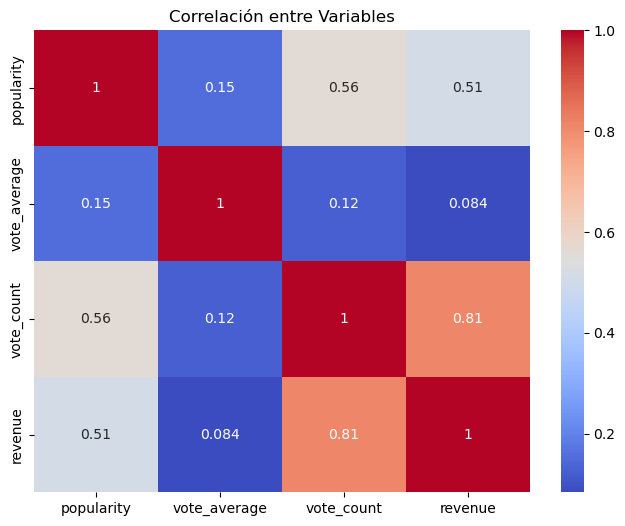

In [24]:
selected_vars = ['popularity', 'vote_average', 'vote_count', 'revenue']
selected_df = df[selected_vars]

# Calculo la matriz de correlación
correlation_matrix = selected_df.corr()

# Genero el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables')
plt.show()